# Mnist NN higher level API

In [3]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

# parameters
learning_rate = 0.01
training_epochs = 15
batch_size = 100
keep_prob = 0.7

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name='train_mode')

hidden_output_size = 512
final_output_size = 10

xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

with arg_scope([fully_connected],
              activation_fn=tf.nn.relu,
              weights_initializer=xavier_init,
              biases_initializer=None,
              normalizer_fn=batch_norm,
              normalizer_params=bn_params):
    
    hidden_layer1 = fully_connected(X, hidden_output_size, scope='h1')
    h1_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope='h2')
    h2_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope='h3')
    h3_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope='h4')
    h4_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope='hypothesis')
    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        
        avg_cost += c / total_batch
        
    print(f'[Epoch: {epoch+1:>4}], cost = {avg_cost:>.9}')
    
print('Learning Finished!')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

[Epoch:    1], cost = 0.516823193
[Epoch:    2], cost = 0.438465774
[Epoch:    3], cost = 0.415995576
[Epoch:    4], cost = 0.404662877
[Epoch:    5], cost = 0.397524664
[Epoch:   

In [6]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels, train_mode: False}))

Accuracy: 0.9828


In [10]:
r = random.randint(0, mnist.test.num_examples-1)
print('Label:', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

Label: [9]


In [11]:
print('Prediction:', sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1], train_mode: False}))

Prediction: [9]


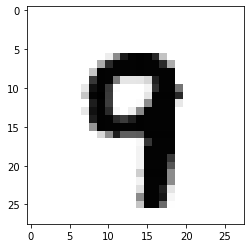

In [12]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()